In [15]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import os
import keras

Using TensorFlow backend.


In [ ]:
from tensorflow.keras.

In [5]:
train_datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    featurewise_center=True,
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        './data/training_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 1572 images belonging to 4 classes.


In [6]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

hostory = model.fit(
        train_generator,
        epochs=10)

W0809 13:16:25.964033 11456 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
50/50 [==============================] - 163s 3s/step - loss: 1.2681 - acc: 0.4739
Epoch 2/10
50/50 [==============================] - 161s 3s/step - loss: 0.8368 - acc: 0.6991
Epoch 3/10
50/50 [==============================] - 156s 3s/step - loss: 0.7396 - acc: 0.7392
Epoch 4/10
50/50 [==============================] - 150s 3s/step - loss: 0.6000 - acc: 0.7901
Epoch 5/10
50/50 [==============================] - 154s 3s/step - loss: 0.5749 - acc: 0.7983
Epoch 6/10
50/50 [==============================] - 164s 3s/step - loss: 0.5092 - acc: 0.8206
Epoch 7/10
50/50 [==============================] - 169s 3s/step - loss: 0.4810 - acc: 0.8276
Epoch 8/10
50/50 [==============================] - 168s 3s/step - loss: 0.4216 - acc: 0.8492
Epoch 9/10
50/50 [==============================] - 169s 3s/step - loss: 0.3907 - acc: 0.8690
Epoch 10/10
50/50 [==============================] - 172s 3s/step - loss: 0.4189 - acc: 0.8422


In [45]:
model.save('Model_Save/retail_img_clf_cnn_1.h5')

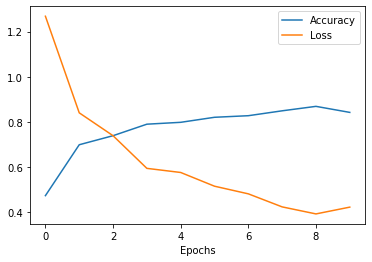

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hostory.history['acc'],label='Accuracy')

plt.plot(hostory.history['loss'],label='Loss')
plt.legend()
plt.xlabel('Epochs')

plt.show()


[0. 0. 0. 1.]
Tops


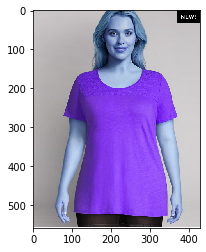

[8.146512e-18 1.000000e+00 0.000000e+00 0.000000e+00]
Shoes


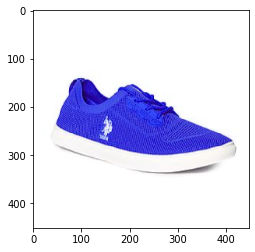

[0. 0. 1. 0.]
Sunglasses


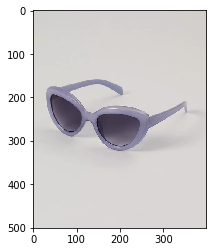

[1. 0. 0. 0.]
Jeans


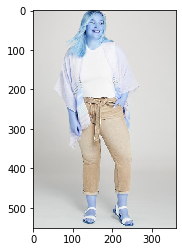

[0. 1. 0. 0.]
Shoes


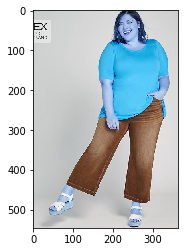

[0. 0. 1. 0.]
Sunglasses


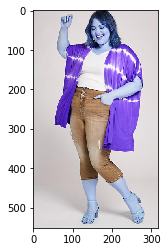

[0. 1. 0. 0.]
Shoes


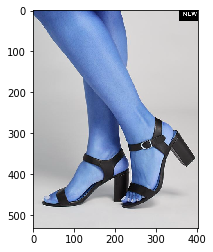

[1. 0. 0. 0.]
Jeans


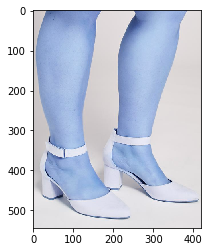

[0. 1. 0. 0.]
Shoes


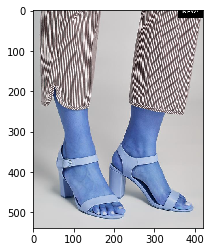

[0. 1. 0. 0.]
Shoes


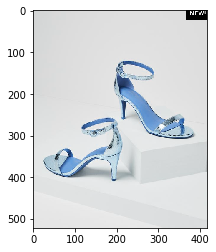

[0.0000000e+00 8.4144307e-29 0.0000000e+00 1.0000000e+00]
Tops


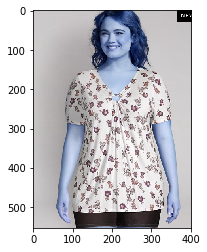

[0. 1. 0. 0.]
Shoes


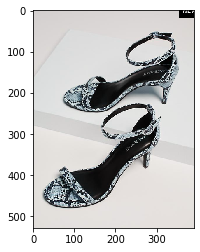

[0.02439402 0.975606   0.         0.        ]
Shoes


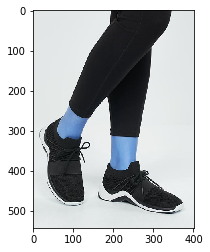

[0. 1. 0. 0.]
Shoes


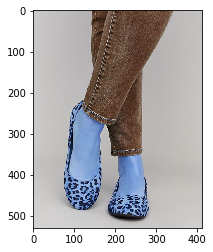

[1. 0. 0. 0.]
Jeans


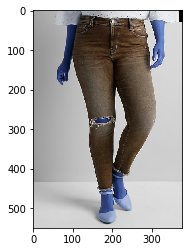

[1. 0. 0. 0.]
Jeans


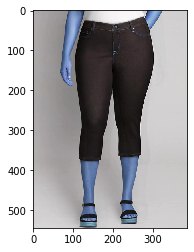

[0. 0. 1. 0.]
Sunglasses


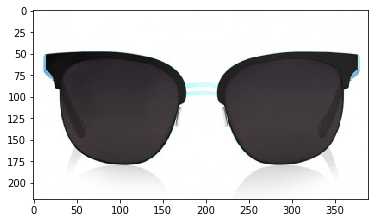

[0. 0. 1. 0.]
Sunglasses


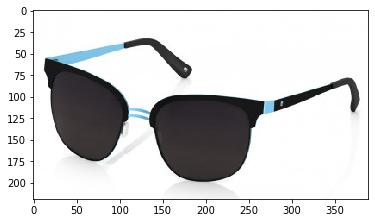

[1.5530527e-25 1.0000000e+00 0.0000000e+00 0.0000000e+00]
Shoes


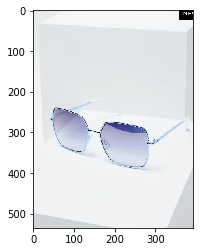

[0.0000000e+00 1.0000000e+00 2.5681182e-13 0.0000000e+00]
Shoes


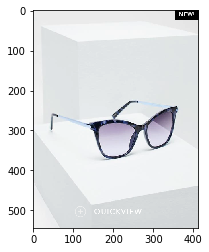

[0. 1. 0. 0.]
Shoes


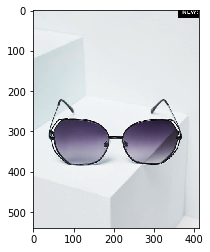

[0. 0. 1. 0.]
Sunglasses


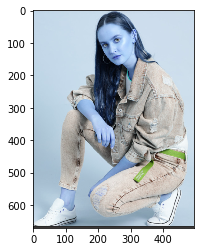

In [62]:
IMG_DIR = './data/retail/'
cat_dic = {0:'Jeans',1:'Shoes',2:'Sunglasses',3:'Tops'}


img_list = os.listdir(IMG_DIR)

images_path = [os.path.join(IMG_DIR,img) for img in img_list]

import cv2 

for img_path in images_path:
    image = cv2.imread(img_path) 
    new_image = cv2.resize(image,(150,150)) 
    input_arr = keras.preprocessing.image.img_to_array(new_image)
    #input_arr = input_arr*1/255.0
    input_arr = np.array([input_arr])
    # Convert single image to a batch.
    predictions = model.predict_proba(input_arr)
    print(predictions[0])
    print(cat_dic[np.argmax(predictions[0])])
    plt.imshow(image)
    plt.show()

In [25]:
cat_dic[np.argmax(predictions[0])]

'Tops'